Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re
from sklearn.preprocessing import MinMaxScaler
import scipy  
import scikits.bootstrap as bootstrap
import seaborn as sns
from sklearn.feature_selection import RFECV
from collections import OrderedDict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_selection import chi2

In [2]:
import warnings
warnings.filterwarnings('ignore')

1 (a).

Loading Data

In [3]:
bending1 = glob.glob('AReM/bending1/*.csv')
bending1.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in bending1:
    with open(f) as b1:
        headers = [ next(b1) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(b1, sep=',', names=cols)
        exec(f'b1{num} = df')
        num = num+1

In [4]:
bending2 = glob.glob('AReM/bending2/*.csv')
bending2.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in bending2:
    with open(f) as b2:
        headers = [ next(b2) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(b2, sep=',', names=cols)
        exec(f'b2{num} = df')
        num = num+1

In [5]:
cycling = glob.glob('AReM/cycling/*.csv')
cycling.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in cycling:
    with open(f) as c:
        headers = [ next(c) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(c, sep=',', names=cols)
        exec(f'c{num} = df')
        num = num+1

In [6]:
lying = glob.glob('AReM/lying/*.csv')
lying.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in lying:
    with open(f) as l:
        headers = [ next(l) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(l, sep=',', names=cols)
        exec(f'l{num} = df')
        num = num+1

In [7]:
sitting = glob.glob('AReM/sitting/*.csv')
sitting.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in sitting:
    with open(f) as si:
        headers = [ next(si) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(si, sep=',', names=cols)
        exec(f'si{num} = df')
        num = num+1

In [8]:
standing = glob.glob('AReM/standing/*.csv')
standing.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in standing:
    with open(f) as st:
        headers = [ next(st) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(st, sep=',', names=cols)
        exec(f'st{num} = df')
        num = num+1

In [9]:
walking = glob.glob('AReM/walking/*.csv')
walking.sort(key=lambda f: int(re.sub('\D', '', f)))
num = 1
for f in walking:
    with open(f) as w:
        headers = [ next(w) for i in range(5) ]
        cols = headers[4].split(':', 1)[1].strip().split(',')
        df = pd.read_csv(w, sep=',', names=cols)
        exec(f'w{num} = df')
        num = num+1

In [10]:
with open('AReM/bending2/dataset4.csv') as b2:
    headers = [ next(b2) for i in range(5) ]
    cols = headers[4].split(':', 1)[1].strip().split(',')
    b24 = pd.read_csv(b2, delim_whitespace=True, names=cols)

(b).

Split train and test set

In [11]:
test_dfs = [b11,b12,b21,b22,c1,c2,c3,l1,l2,l3,
           si1,si2,si3,st1,st2,st3,w1,w2,w3]

In [12]:
train_dfs = [b13,b14,b15,b16,b17,b23,b24,b25,b26,
            c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,
            l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,
            si4,si5,si6,si7,si8,si9,si10,si11,si12,si13,si14,si15,
            st4,st5,st6,st7,st8,st9,st10,st11,st12,st13,st14,st15,
            w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15]

(c) i.

minimum (min), maximum (min), mean, standard variation (std), median, lower quartile (Q1), upper quartile (Q3), mode, range, interquartile range (IQR), coefficient of variation (CV), skewness (skew) and kurtosis (kurt)

(c) ii.

Calculate time-domain features

In [13]:
dfs = [b11,b12,b13,b14,b15,b16,b17,
        b21,b22,b23,b24,b25,b26,
        c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,
        l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12,l13,l14,l15,
        si1,si2,si3,si4,si5,si6,si7,si8,si9,si10,si11,si12,si13,si14,si15,
        st1,st2,st3,st4,st5,st6,st7,st8,st9,st10,st11,st12,st13,st14,st15,
        w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15]

In [14]:
summary = pd.DataFrame(columns=['Instance','min1','max1','mean1','median1','std1','1st quart1','3rd quart1',
                                'min2','max2','mean2','median2','std2','1st quart2','3rd quart2',
                                'min3','max3','mean3','median3','std3','1st quart3','3rd quart3',
                                'min4','max4','mean4','median4','std4','1st quart4','3rd quart4',
                                'min5','max5','mean5','median5','std5','1st quart5','3rd quart5',
                                'min6','max6','mean6','median6','std6','1st quart6','3rd quart6'],index=range(1,89))
for i in range(0,88):
    summary.iloc[i,0] = i+1
    Min = dfs[i].min()
    Max = dfs[i].max()
    mean = dfs[i].mean()
    median = dfs[i].median()
    std = dfs[i].std()
    quantile = dfs[i].quantile([.25, .75])
    summary.iloc[i,1] = Min[1]
    summary.iloc[i,2] = Max[1]
    summary.iloc[i,3] = mean[1]
    summary.iloc[i,4] = median[1]
    summary.iloc[i,5] = std[1]
    summary.iloc[i,6] = quantile.iloc[0,1]
    summary.iloc[i,7] = quantile.iloc[1,1]

    summary.iloc[i,8] = Min[2]
    summary.iloc[i,9] = Max[2]
    summary.iloc[i,10] = mean[2]
    summary.iloc[i,11] = median[2]
    summary.iloc[i,12] = std[2]
    summary.iloc[i,13] = quantile.iloc[0,2]
    summary.iloc[i,14] = quantile.iloc[1,2]
    
    summary.iloc[i,15] = Min[3]
    summary.iloc[i,16] = Max[3]
    summary.iloc[i,17] = mean[3]
    summary.iloc[i,18] = median[3]
    summary.iloc[i,19] = std[3]
    summary.iloc[i,20] = quantile.iloc[0,3]
    summary.iloc[i,21] = quantile.iloc[1,3]
    
    summary.iloc[i,22] = Min[4]
    summary.iloc[i,23] = Max[4]
    summary.iloc[i,24] = mean[4]
    summary.iloc[i,25] = median[4]
    summary.iloc[i,26] = std[4]
    summary.iloc[i,27] = quantile.iloc[0,4]
    summary.iloc[i,28] = quantile.iloc[1,4]
    
    summary.iloc[i,29] = Min[5]
    summary.iloc[i,30] = Max[5]
    summary.iloc[i,31] = mean[5]
    summary.iloc[i,32] = median[5]
    summary.iloc[i,33] = std[5]
    summary.iloc[i,34] = quantile.iloc[0,5]
    summary.iloc[i,35] = quantile.iloc[1,5]
    
    summary.iloc[i,36] = Min[6]
    summary.iloc[i,37] = Max[6]
    summary.iloc[i,38] = mean[6]
    summary.iloc[i,39] = median[6]
    summary.iloc[i,40] = std[6]
    summary.iloc[i,41] = quantile.iloc[0,6]
    summary.iloc[i,42] = quantile.iloc[1,6]
summary = summary.set_index(summary.columns[0])
summary

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45,40.6248,40.5,1.47697,39.25,42,0,1.3,0.358604,...,2.18845,33,36,0,1.92,0.570583,0.43,0.582915,0,1.3
2,38,45.67,42.8128,42.5,1.43555,42,43.67,0,1.22,0.372438,...,1.99525,32,34.5,0,3.11,0.571083,0.43,0.60101,0,1.3
3,35,47.4,43.9545,44.33,1.55884,43,45,0,1.7,0.42625,...,1.9996,35.3625,36.5,0,1.79,0.493292,0.43,0.513506,0,0.94
4,33,47.75,42.1798,43.5,3.67067,39.15,45,0,3,0.696042,...,3.84945,30.4575,36.33,0,2.18,0.613521,0.5,0.524317,0,1
5,33,45.75,41.6781,41.75,2.24349,41.33,42.75,0,2.83,0.535979,...,2.41103,28.4575,31.25,0,1.79,0.383292,0.43,0.389164,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,19.5,45.33,33.5869,34.25,4.65094,30.25,37,0,14.67,4.57656,...,3.28398,13.73,18.25,0,8.32,3.25973,3.11,1.64024,2.05,4.3225
85,19.75,45.5,34.3227,35.25,4.75248,31,38,0,13.47,4.45633,...,3.11986,13.5,17.75,0,9.67,3.43256,3.2,1.73273,2.1575,4.565
86,19.5,46,34.5462,35.25,4.84229,31.25,37.8125,0,12.47,4.37196,...,2.82312,14,17.75,0,10,3.33813,3.08,1.65674,2.16,4.335


Normalize

In [15]:
summary_norm = pd.DataFrame(columns=['Instance','min1','max1','mean1','median1','std1','1st quart1','3rd quart1',
                                'min2','max2','mean2','median2','std2','1st quart2','3rd quart2',
                                'min3','max3','mean3','median3','std3','1st quart3','3rd quart3',
                                'min4','max4','mean4','median4','std4','1st quart4','3rd quart4',
                                'min5','max5','mean5','median5','std5','1st quart5','3rd quart5',
                                'min6','max6','mean6','median6','std6','1st quart6','3rd quart6'],index=range(1,89))
for i in range(0,88):
    scaler = MinMaxScaler()
    scaler.fit(dfs[i]);
    df_norm = scaler.transform(dfs[i])
    df_norm = pd.DataFrame(df_norm,columns = dfs[i].columns)
    summary_norm.iloc[i,0] = i+1
    Min = df_norm.min()
    Max = df_norm.max()
    mean = df_norm.mean()
    median = df_norm.median()
    std = df_norm.std()
    quantile = df_norm.quantile([.25, .75])
    summary_norm.iloc[i,1] = Min[1]
    summary_norm.iloc[i,2] = Max[1]
    summary_norm.iloc[i,3] = mean[1]
    summary_norm.iloc[i,4] = median[1]
    summary_norm.iloc[i,5] = std[1]
    summary_norm.iloc[i,6] = quantile.iloc[0,1]
    summary_norm.iloc[i,7] = quantile.iloc[1,1]

    summary_norm.iloc[i,8] = Min[2]
    summary_norm.iloc[i,9] = Max[2]
    summary_norm.iloc[i,10] = mean[2]
    summary_norm.iloc[i,11] = median[2]
    summary_norm.iloc[i,12] = std[2]
    summary_norm.iloc[i,13] = quantile.iloc[0,2]
    summary_norm.iloc[i,14] = quantile.iloc[1,2]
    
    summary_norm.iloc[i,15] = Min[3]
    summary_norm.iloc[i,16] = Max[3]
    summary_norm.iloc[i,17] = mean[3]
    summary_norm.iloc[i,18] = median[3]
    summary_norm.iloc[i,19] = std[3]
    summary_norm.iloc[i,20] = quantile.iloc[0,3]
    summary_norm.iloc[i,21] = quantile.iloc[1,3]
    
    summary_norm.iloc[i,22] = Min[4]
    summary_norm.iloc[i,23] = Max[4]
    summary_norm.iloc[i,24] = mean[4]
    summary_norm.iloc[i,25] = median[4]
    summary_norm.iloc[i,26] = std[4]
    summary_norm.iloc[i,27] = quantile.iloc[0,4]
    summary_norm.iloc[i,28] = quantile.iloc[1,4]
    
    summary_norm.iloc[i,29] = Min[5]
    summary_norm.iloc[i,30] = Max[5]
    summary_norm.iloc[i,31] = mean[5]
    summary_norm.iloc[i,32] = median[5]
    summary_norm.iloc[i,33] = std[5]
    summary_norm.iloc[i,34] = quantile.iloc[0,5]
    summary_norm.iloc[i,35] = quantile.iloc[1,5]
    
    summary_norm.iloc[i,36] = Min[6]
    summary_norm.iloc[i,37] = Max[6]
    summary_norm.iloc[i,38] = mean[6]
    summary_norm.iloc[i,39] = median[6]
    summary_norm.iloc[i,40] = std[6]
    summary_norm.iloc[i,41] = quantile.iloc[0,6]
    summary_norm.iloc[i,42] = quantile.iloc[1,6]
summary_norm = summary_norm.set_index(summary_norm.columns[0])
summary_norm

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,0,1,0.435457,0.419355,0.190576,0.258065,0.612903,0,1,0.275849,...,0.19895,0.522727,0.795455,0,1,0.297179,0.223958,0.303602,0,0.677083
2,0,1,0.627485,0.586701,0.187164,0.521512,0.739244,0,1,0.305277,...,0.184234,0.399815,0.630656,0,1,0.183628,0.138264,0.193251,0,0.418006
3,0,1,0.722137,0.752419,0.125713,0.645161,0.806452,0,1,0.250735,...,0.210485,0.669737,0.789474,0,1,0.275582,0.240223,0.286875,0,0.52514
4,0,1,0.62236,0.711864,0.248859,0.416949,0.813559,0,1,0.232014,...,0.206184,0.560123,0.874665,0,1,0.281432,0.229358,0.240512,0,0.458716
5,0,1,0.680632,0.686275,0.17596,0.653333,0.764706,0,1,0.189392,...,0.174333,0.346168,0.548084,0,1,0.214129,0.240223,0.21741,0,0.27933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,1,0.545369,0.571041,0.180059,0.416183,0.677507,0,1,0.311967,...,0.175896,0.396358,0.638457,0,1,0.391794,0.373798,0.197145,0.246394,0.519531
85,0,1,0.565932,0.601942,0.184562,0.436893,0.708738,0,1,0.330834,...,0.183521,0.426471,0.676471,0,1,0.35497,0.33092,0.179186,0.223113,0.472079
86,0,1,0.567782,0.59434,0.182728,0.443396,0.691038,0,1,0.350598,...,0.179246,0.444444,0.68254,0,1,0.333813,0.308,0.165674,0.216,0.4335


(c) iii.

90% confidence interval

In [16]:
stds = summary.std()
CI = pd.DataFrame(columns=stds.index,index=['Lower', 'Std', 'Upper'])
for i in range(0,42):
    CIs = bootstrap.ci(data=summary.iloc[:,i], statfunction=scipy.std,alpha=0.1)
    CI.iloc[0,i] = CIs[0]
    CI.iloc[1,:] = summary.std()
    CI.iloc[2,i] = CIs[1]
CI

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
Lower,8.51382,3.5258,4.79375,4.88412,1.60523,5.66186,4.43665,0,4.67505,1.4106,...,0.859865,4.97445,4.52095,0,2.30123,1.06845,0.997648,0.482116,0.693762,1.40093
Std,9.56998,4.39436,5.33572,5.44005,1.77215,6.15359,5.13892,0,5.06273,1.57416,...,1.0249,6.09647,5.53172,0.0458382,2.51892,1.15481,1.08647,0.517617,0.758584,1.5236
Upper,11.1428,5.52486,5.99438,6.12236,1.99138,6.72867,5.9696,0,5.4415,1.71156,...,1.29414,7.40245,6.73522,0.108385,2.84169,1.21352,1.14807,0.546043,0.808987,1.59645


(c) iv.

Three most important features I choose: max, mean, std

max gives highest value of time series features, mean gives the average value of time series features and standard deviation gives the spred out of the time series features.

(d) i.

Train data plot with time-domain features

In [17]:
train_sum = summary.drop([1,2,8,9,14,15,16,29,30,31,44,45,46,59,60,61,74,75,76])
train_sum = train_sum[["mean1","median1","std1",
                       "mean2","median2","std2",
                       "mean6","median6","std6"]]
train_sum['activity'] = ''
train_sum.iloc[0:9,9] = "bending"
train_sum.iloc[9:,9] = "other"
train_sum = train_sum.reset_index()
train_sum

,Instance,mean1,median1,std1,mean2,median2,std2,mean6,median6,std6,activity
0,3,43.9545,44.33,1.55884,0.42625,0.47,0.33869,0.493292,0.43,0.513506,bending
1,4,42.1798,43.5,3.67067,0.696042,0.5,0.63086,0.613521,0.5,0.524317,bending
2,5,41.6781,41.75,2.24349,0.535979,0.5,0.405469,0.383292,0.43,0.389164,bending
3,6,43.455,43.25,1.3861,0.378083,0.47,0.315566,0.679646,0.5,0.622534,bending
4,7,43.9691,44.5,1.61836,0.413125,0.47,0.263111,0.555313,0.49,0.487826,bending
...,...,...,...,...,...,...,...,...,...,...,...
64,84,33.5869,34.25,4.65094,4.57656,4.26,2.46108,3.25973,3.11,1.64024,other
65,85,34.3227,35.25,4.75248,4.45633,3.9,2.59928,3.43256,3.2,1.73273,other
66,86,34.5462,35.25,4.84229,4.37196,4.135,2.36045,3.33813,3.08,1.65674,other
67,87,34.8732,35.25,4.53172,4.38058,3.925,2.43544,3.42465,3.27,1.69096,other


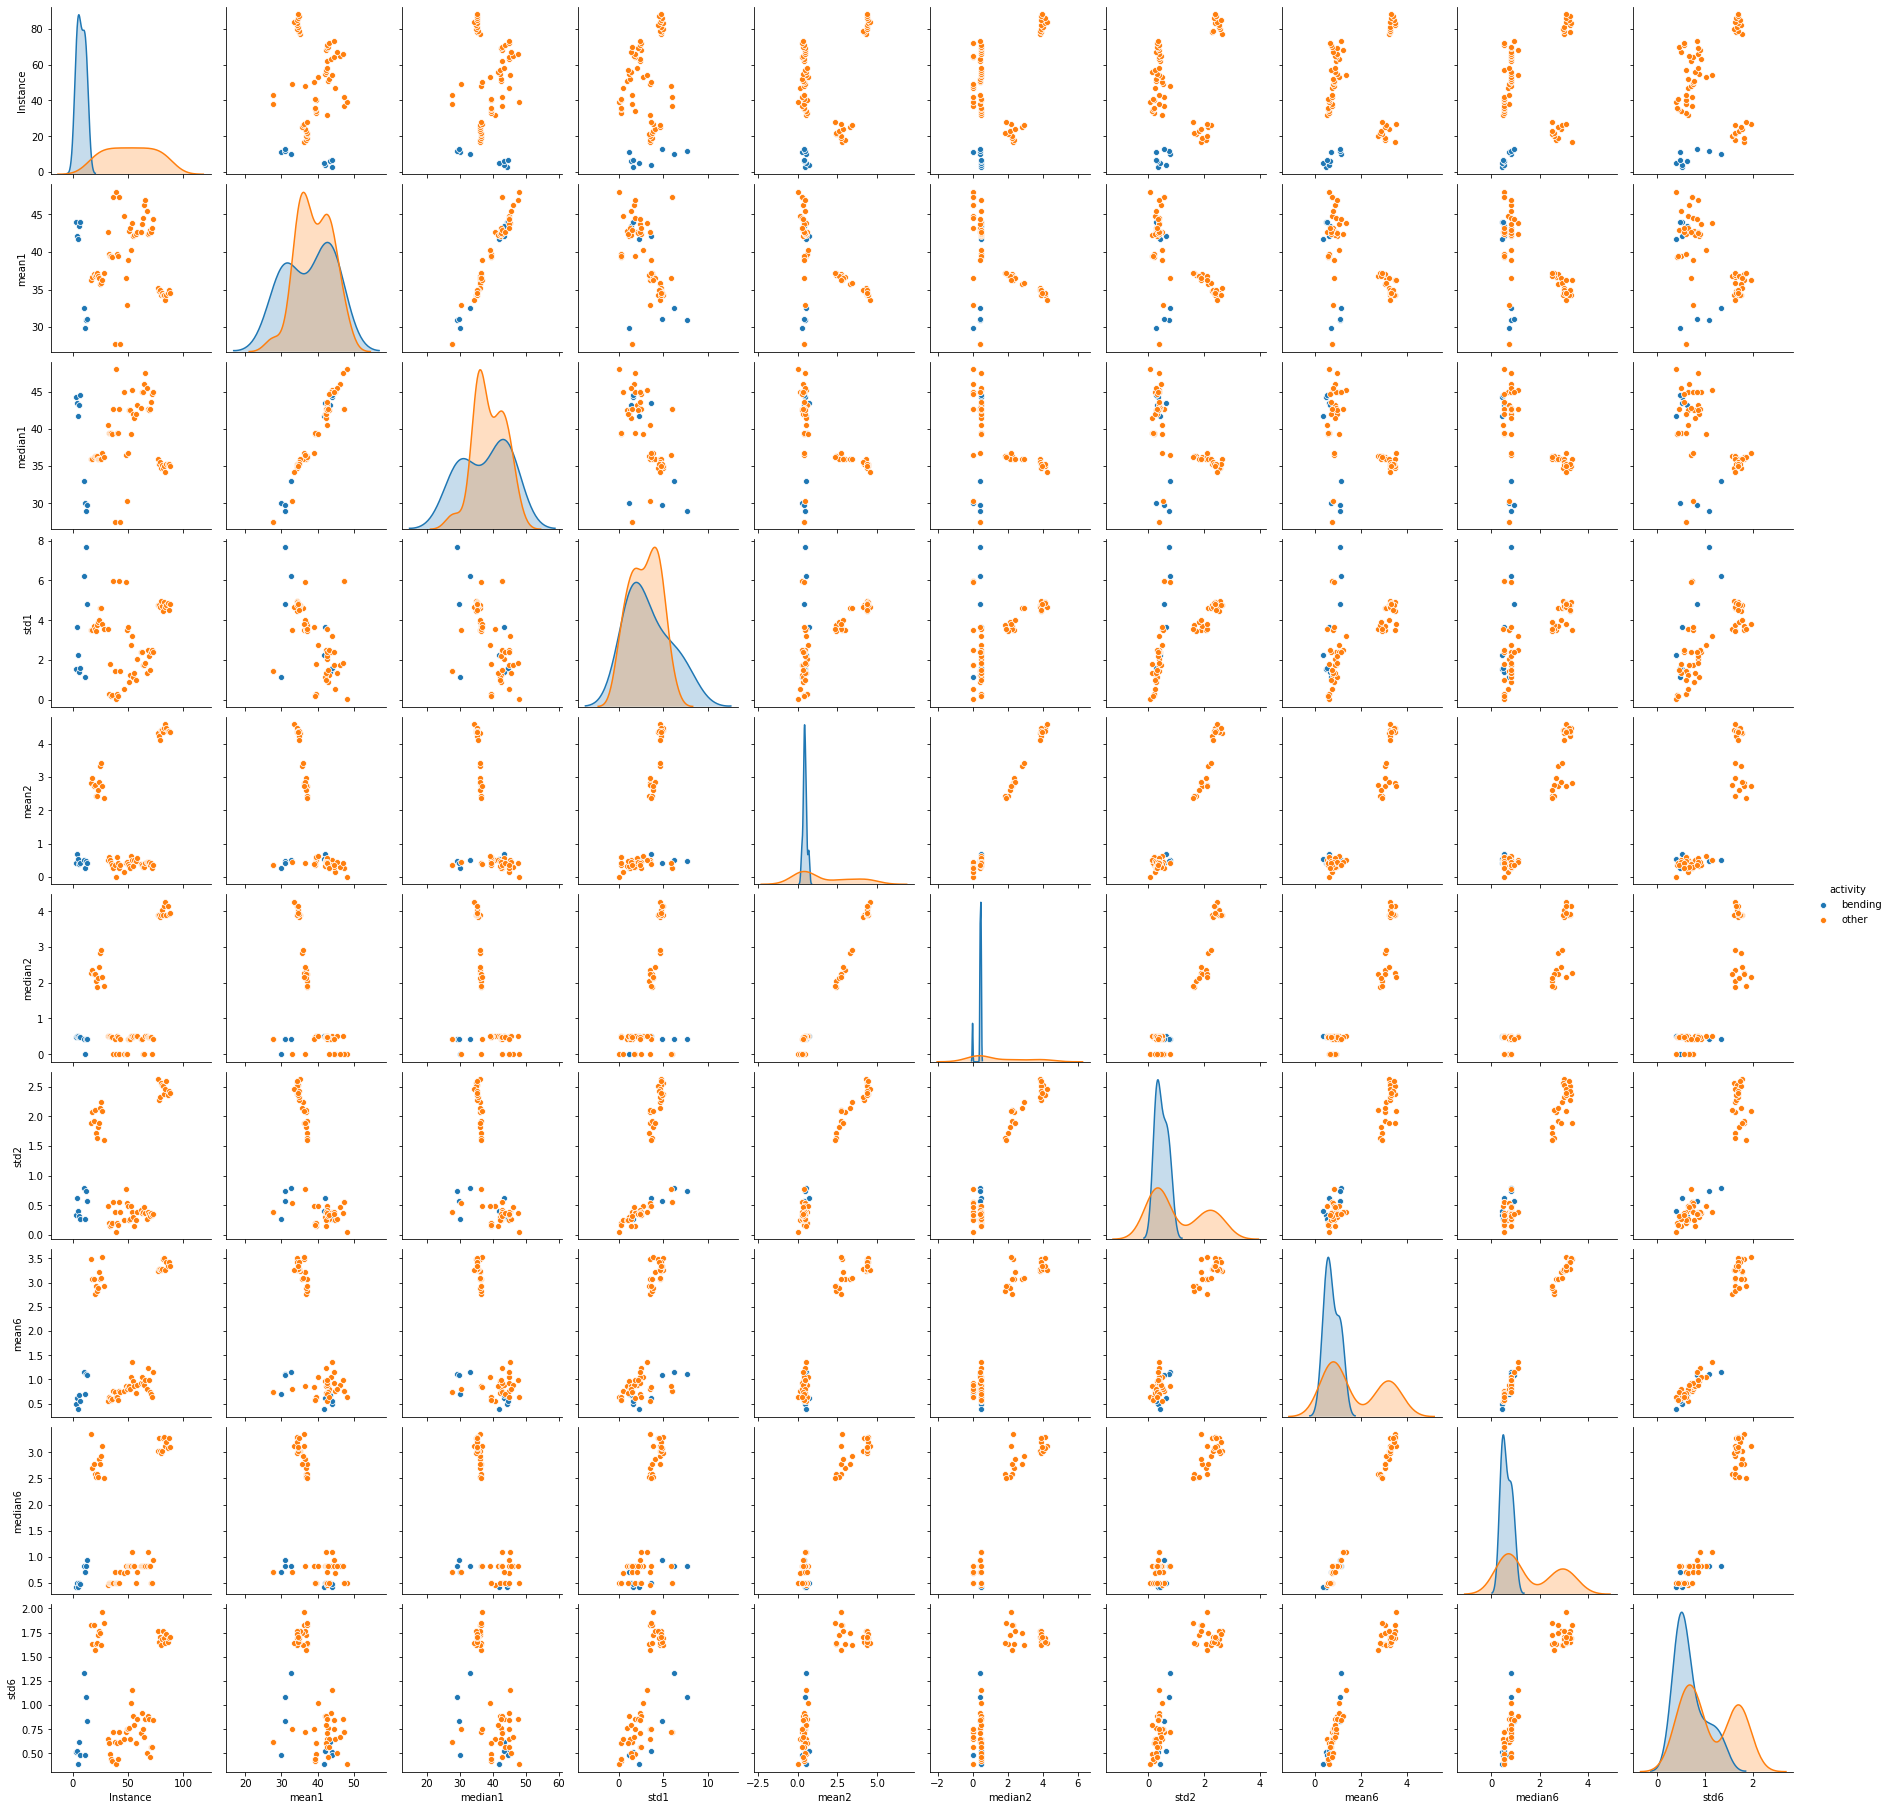

In [18]:
sns.pairplot(train_sum,hue = "activity")

(d) ii.

Train data split into two

In [19]:
df_2 = []
for i in range(0,len(train_dfs)):
    df = train_dfs[i].iloc[:,1:7]
    df_split=np.array_split(df,2)
    ds0 = df_split[0].reset_index(drop=True)
    ds1 = df_split[1].reset_index(drop=True)
    new_df = pd.concat([ds0,ds1],axis=1)
    if i < 9:
        new_df['activity'] = "bending"
    else:
        new_df['activity'] = "others"
    df_2.append(new_df)
df_2[21].head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,48.0,0.0,9.0,0.00,9.25,0.43,40.60,0.49,12.0,0.0,2.50,0.50,others
1,48.0,0.0,9.0,0.00,9.50,0.50,40.50,0.50,12.0,0.0,2.00,0.00,others
2,48.0,0.0,10.0,0.71,10.00,0.71,40.33,0.47,12.0,0.0,3.00,0.00,others
3,48.0,0.0,9.5,0.50,9.50,0.50,40.00,1.00,12.0,0.0,1.50,0.87,others
4,48.0,0.0,10.0,0.00,10.00,1.00,40.50,0.50,12.0,0.0,1.33,0.47,others


calculate time-domain features

In [20]:
ts = pd.DataFrame(columns=['mean1','median1','std1','mean2','median2',
                                     'std2','mean12','median12','std12','activity'],index=range(1,70))
for i in range(0,len(df_2)):
    mean = df_2[i].mean()
    median = df_2[i].median()
    std = df_2[i].std()
    ts.iloc[i,0] = mean[0]
    ts.iloc[i,1] = median[0]
    ts.iloc[i,2] = std[0]

    ts.iloc[i,3] = mean[1]
    ts.iloc[i,4] = median[1]
    ts.iloc[i,5] = std[1]

    ts.iloc[i,6] = mean[11]
    ts.iloc[i,7] = median[11]
    ts.iloc[i,8] = std[11]
    
    ts.iloc[i,9] = df_2[i].iloc[0,12]
    
ts.head()

,mean1,median1,std1,mean2,median2,std2,mean12,median12,std12,activity
1,44.0572,44.5,1.55697,0.381042,0.47,0.32954,0.388333,0,0.478528,bending
2,43.2789,45,3.47335,0.673292,0.485,0.634285,0.586083,0.47,0.491873,bending
3,41.6212,42.33,3.11864,0.623083,0.5,0.489595,0.3475,0.43,0.363144,bending
4,44.117,45,1.35984,0.250042,0,0.314099,0.543875,0.5,0.473445,bending
5,43.4862,43.71,1.28198,0.378667,0.47,0.284434,0.58575,0.5,0.487918,bending


plot with time-domain features

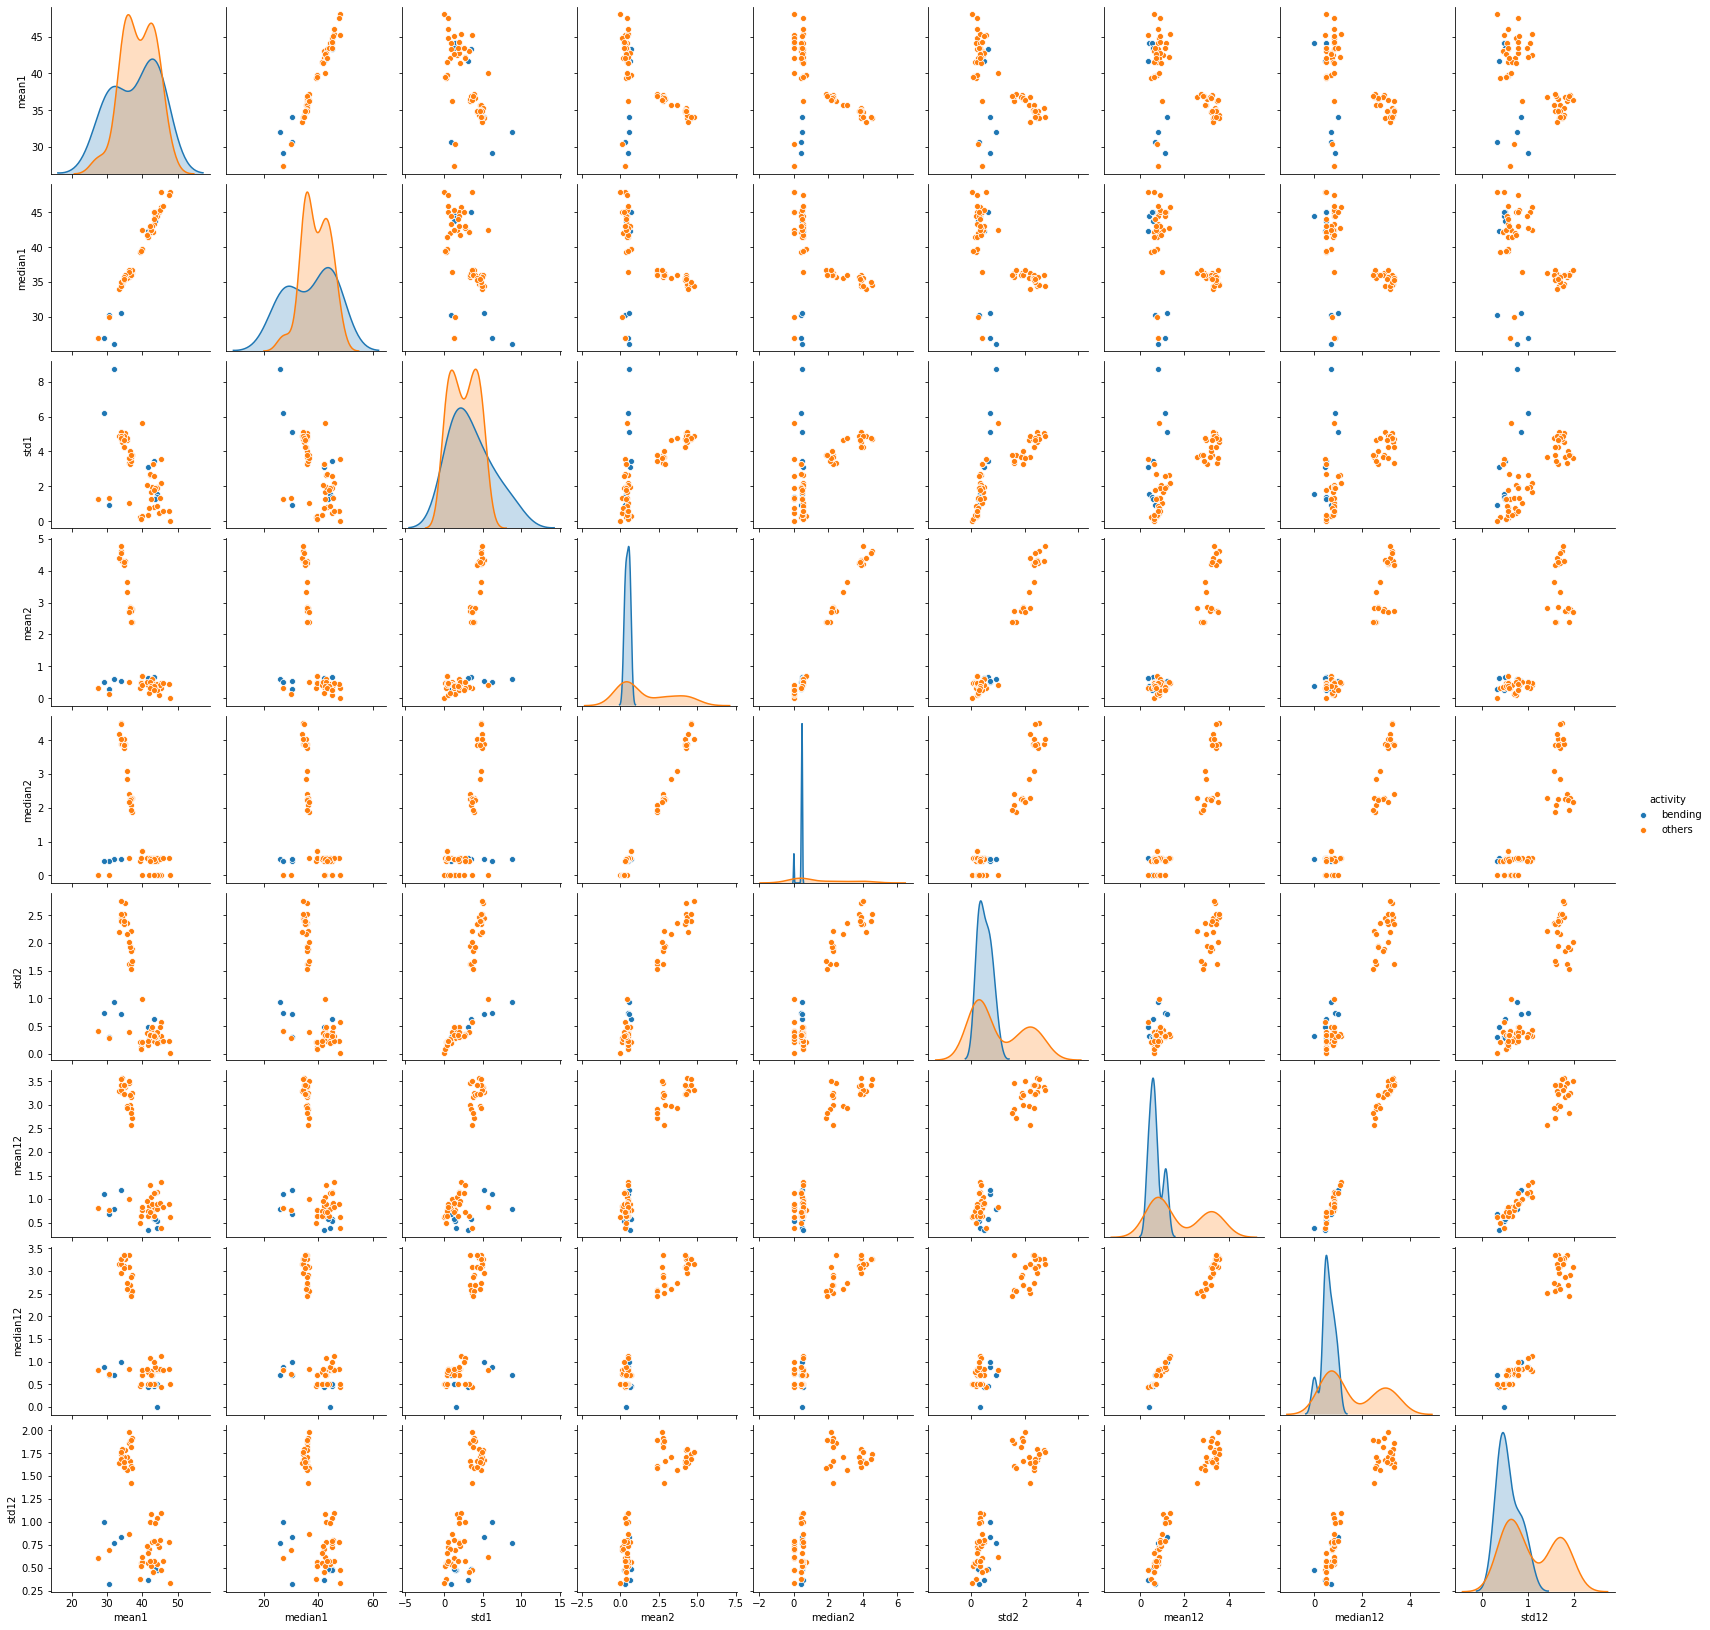

In [21]:
sns.pairplot(ts,hue = "activity")

They are basically the same with slightly difference

(d) iii.

Split data into l part

In [22]:
result = OrderedDict()
DFs = []
for l in range(1,21):
    result[l] = {}
    for i in range(0,len(train_dfs)):
        df = train_dfs[i].iloc[:,1:7]
        df_split=np.array_split(df,l)
        ds = []
        for k in range(0,l):
            dss = df_split[k].reset_index(drop=True)
            ds.append(dss)
            new_df = pd.concat(ds,axis=1)
        result[l][i] = {}
        result[l][i]['L'] = l
        result[l][i]['Instances'] = i+1
        for c in range(0,6*l):
            result[l][i]['max'+str(c+1)] = new_df.iloc[:,c].max()
            result[l][i]['mean'+str(c+1)] = new_df.iloc[:,c].mean()
            result[l][i]['median'+str(c+1)] = new_df.iloc[:,c].std()
        if i < 9:
            result[l][i]['activity'] = "1"
        else:
            result[l][i]['activity'] = "0"
    DF = pd.DataFrame.from_dict({(a,b): result[a][b] 
                           for a in result.keys() 
                           for b in result[a].keys()},
                       orient='index').reset_index(drop=True)
    sdf = DF[DF['L'] == l].dropna(axis='columns')
    DFs.append(sdf)
DFs[0]

,L,Instances,max1,mean1,median1,max2,mean2,median2,max3,mean3,...,max4,mean4,median4,max5,mean5,median5,max6,mean6,median6,activity
0,1,1,47.40,43.954500,1.558835,1.70,0.426250,0.338690,29.75,22.122354,...,4.44,0.497313,0.550657,38.50,35.588458,1.999604,1.79,0.493292,0.513506,1
1,1,2,47.75,42.179813,3.670666,3.00,0.696042,0.630860,30.00,22.183625,...,5.15,0.989917,0.953730,38.67,33.493917,3.849448,2.18,0.613521,0.524317,1
2,1,3,45.75,41.678063,2.243490,2.83,0.535979,0.405469,28.25,19.006562,...,6.42,0.841875,0.928801,37.50,29.857083,2.411026,1.79,0.383292,0.389164,1
3,1,4,48.00,43.454958,1.386098,1.58,0.378083,0.315566,27.00,15.793333,...,10.03,0.849354,0.995761,33.50,23.034792,2.488862,5.26,0.679646,0.622534,1
4,1,5,48.00,43.969125,1.618364,1.50,0.413125,0.263111,26.33,15.868021,...,5.17,0.666354,0.788985,30.75,22.103750,3.318301,2.96,0.555313,0.487826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,65,45.33,33.586875,4.650935,14.67,4.576562,2.461077,23.25,15.317854,...,9.00,3.227229,1.647474,25.00,15.892146,3.283983,8.32,3.259729,1.640243,0
65,1,66,45.50,34.322750,4.752477,13.47,4.456333,2.599284,22.25,15.209771,...,9.00,3.277229,1.500046,23.25,15.550458,3.119856,9.67,3.432562,1.732727,0
66,1,67,46.00,34.546229,4.842294,12.47,4.371958,2.360448,22.67,15.185729,...,8.34,3.028687,1.665184,22.75,15.759542,2.823124,10.00,3.338125,1.656742,0
67,1,68,46.25,34.873229,4.531720,14.82,4.380583,2.435437,24.25,15.471188,...,9.90,3.205688,1.519348,23.50,15.873896,3.131076,9.51,3.424646,1.690960,0


fit in logistic regression model

In [23]:
result1 = {}
for l in range(0,20):
    X_train = DFs[l].drop(['activity','L','Instances'],axis = 1)
    y_train = DFs[l]['activity']
    model = LogisticRegression(C = 10000000000000, solver = 'lbfgs')
    rfecv = RFECV(model,cv = 5)
    np_arr = X_train.to_numpy()
    fit = rfecv.fit(np_arr,y_train)
    result1[l] = [l+1,fit.support_,sum(fit.support_),max(fit.grid_scores_),fit.score(np_arr,y_train)]
result1[1]

[2,
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False]),
 4,
 1.0,
 1.0]

pair (l,p)

In [24]:
score = [result1[x][3] for x in range(0,20)]
L = [result1[x][0] for x in range(0,20)]
p = [result1[x][2] for x in range(0,20)]
d_sum = pd.DataFrame({'L': L, 'p': p, 'score': score})
d_sum

,L,p,score
0,1,1,0.985714
1,2,4,1.000000
2,3,11,0.985714
3,4,10,1.000000
4,5,2,0.971429
5,6,10,0.971429
6,7,5,0.985714
7,8,3,0.985714
8,9,6,0.985714
9,10,21,0.971429


In [25]:
d_sum.loc[[d_sum['score'].idxmax()]]

,L,p,score
1,2,4,1.0


(d) iv.

Best features selected

In [26]:
X_train_l2 = DFs[1].drop(['activity','L','Instances'],axis = 1)
y_train_l2 = DFs[1]['activity'].squeeze()
model = LogisticRegression(C = 10000000000000, solver = 'lbfgs')
rfecv = RFECV(model,cv = 5)
np_arr = X_train_l2.to_numpy()
fit = rfecv.fit(np_arr,y_train_l2)
temp = pd.Series(fit.support_,index = list(X_train_l2.columns))
best_features = temp[temp==True].index
print(best_features)

Index(['max1', 'max5', 'mean5', 'mean11'], dtype='object')


Confusion Metrix and p-value


Confusion Matrix:
 [[60  0]
 [ 0  9]]

AUC:
 1.0

Score:
 1.0

p-value:
        P-values features
0  3.312793e-01     max1
1  7.731599e-14     max5
2  1.333840e-16    mean5
3  1.464969e-20   mean11


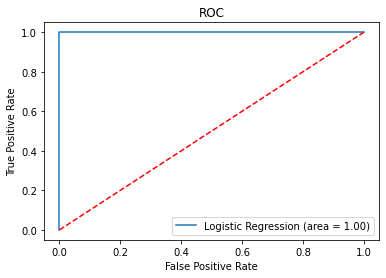

In [27]:
y_pred_l2 = fit.predict(X_train_l2)
cm_l2 = metrics.confusion_matrix(y_train_l2, y_pred_l2 )
y_pred_l2_prob = fit.predict_proba(X_train_l2)

fpr, tpr, _ =metrics.roc_curve(y_train_l2.to_numpy(dtype=int), y_pred_l2_prob[:, 1], pos_label=1)
auc_l2 = metrics.auc(fpr, tpr)
logit_roc_auc = metrics.roc_auc_score(y_train_l2, y_pred_l2)
_,p=chi2(X_train[best_features],y_train)
coef_values_l2 = pd.DataFrame({"P-values":p})
coef_values_l2['features'] = best_features

print('\nConfusion Matrix:\n',cm_l2)
print('\nAUC:\n',auc_l2)
print('\nScore:\n',logit_roc_auc)
print('\np-value:\n',coef_values_l2)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

(d) v.

Split test dataset into l

In [28]:
result = OrderedDict()
DF_test = []
for l in range(1,21):
    result[l] = {}
    for i in range(0,len(test_dfs)):
        df = test_dfs[i].iloc[:,1:7]
        df_split=np.array_split(df,l)
        ds = []
        for k in range(0,l):
            dss = df_split[k].reset_index(drop=True)
            ds.append(dss)
            new_df = pd.concat(ds,axis=1)
        result[l][i] = {}
        result[l][i]['L'] = l
        result[l][i]['Instances'] = i+1
        for c in range(0,6*l):
            result[l][i]['max'+str(c+1)] = new_df.iloc[:,c].max()
            result[l][i]['mean'+str(c+1)] = new_df.iloc[:,c].mean()
            result[l][i]['median'+str(c+1)] = new_df.iloc[:,c].std()
        if i < 4:
            result[l][i]['activity'] = "1"
        else:
            result[l][i]['activity'] = "0"
    DF = pd.DataFrame.from_dict({(a,b): result[a][b] 
                           for a in result.keys() 
                           for b in result[a].keys()},
                       orient='index').reset_index(drop=True)
    sdf = DF[DF['L'] == l].dropna(axis='columns')
    DF_test.append(sdf)
DF_test[0]

,L,Instances,max1,mean1,median1,max2,mean2,median2,max3,mean3,...,max4,mean4,median4,max5,mean5,median5,max6,mean6,median6,activity
0,1,1,45.00,40.624792,1.476967,1.30,0.358604,0.322605,29.50,19.040937,...,7.23,0.832542,0.965659,38.25,34.311292,2.188449,1.92,0.570583,0.582915,1
1,1,2,45.67,42.812812,1.435550,1.22,0.372438,0.289158,29.50,20.096979,...,5.76,0.876438,1.047259,38.50,33.024583,1.995255,3.11,0.571083,0.601010,1
2,1,3,51.00,24.562958,3.737514,6.87,0.590833,0.837408,25.33,19.121333,...,6.76,0.736771,0.927048,30.00,23.493042,3.693786,4.97,0.700188,0.693720,1
3,1,4,42.75,27.464604,3.583582,7.76,0.449708,0.767197,35.00,20.842542,...,5.76,0.779917,0.904436,33.00,17.617937,5.053642,6.76,1.122125,1.012342,1
4,1,5,45.00,37.177042,3.581301,8.58,2.374208,1.601799,26.75,16.531083,...,8.05,2.910604,1.600137,25.50,19.607250,2.890347,9.34,2.921729,1.852600,0
5,1,6,44.75,37.561188,3.226507,9.91,2.080688,1.639258,24.67,16.567042,...,8.32,3.033875,1.625415,24.33,19.518896,2.727377,9.62,2.765896,1.769203,0
6,1,7,44.67,37.058708,3.710180,14.17,2.438146,1.996887,24.00,16.388312,...,9.74,2.980688,1.612059,24.25,18.125958,3.537144,8.55,2.983750,1.815730,0
7,1,8,30.00,27.716375,1.442253,1.79,0.363688,0.394817,13.25,6.078563,...,5.02,0.871021,0.777400,21.00,8.337438,4.074511,4.50,0.734271,0.613688,0
8,1,9,48.33,44.182937,7.495615,3.11,0.101875,0.346756,16.50,6.679958,...,5.91,0.584104,0.749945,12.75,4.376292,3.274539,3.91,0.692771,0.675781,0
9,1,10,48.25,48.004167,0.032038,0.43,0.007167,0.055106,13.00,4.900563,...,2.86,0.397313,0.447127,12.00,7.624896,3.268502,2.50,0.641229,0.388372,0



Confusion Matrix:
 [[15  0]
 [ 1  3]]

AUC:
 1.0

Score:
 0.875

p-value:
        P-values features
0  3.312793e-01     max1
1  7.731599e-14     max5
2  1.333840e-16    mean5
3  1.464969e-20   mean11


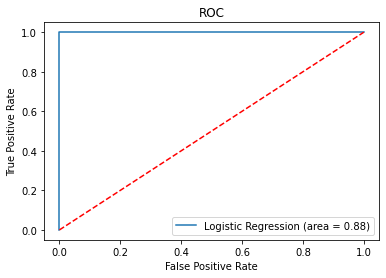

In [29]:
X_test_l2 = DF_test[1].drop(['activity','L','Instances'],axis = 1)
y_test_l2 = DF_test[1]['activity'].squeeze()
y_pred_test_l2 = fit.predict(X_test_l2)
y_pred_test_l2_prob = fit.predict_proba(X_test_l2)
cm_test_l2 = metrics.confusion_matrix(y_test_l2, y_pred_test_l2)

fpr, tpr, _ =metrics.roc_curve(y_test_l2.to_numpy(dtype=int), y_pred_test_l2_prob[:, 1], pos_label=1)
auc_test_l2 = metrics.auc(fpr, tpr)
logit_roc_auc = metrics.roc_auc_score(y_test_l2, y_pred_test_l2)
_,p=chi2(X_train[best_features],y_train)
coef_values = pd.DataFrame({"P-values":p})
coef_values['features'] = best_features

print('\nConfusion Matrix:\n',cm_test_l2)
print('\nAUC:\n',auc_test_l2)
print('\nScore:\n',logit_roc_auc)
print('\np-value:\n',coef_values)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

The accuracy of train set is higher than the test set

(d) vi.

The class is well-separated to cause the instability

(d) vii.


Confusion Matrix:
 [[58  2]
 [ 1  8]]

AUC:
 1.0

Score:
 0.9277777777777778

p-value:
        P-values features
0  3.312793e-01     max1
1  7.731599e-14     max5
2  1.333840e-16    mean5
3  1.464969e-20   mean11


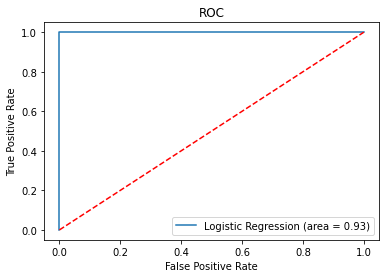

In [30]:
fit = rfecv.fit(X_train_l2.loc[:,best_features],y_train)
pred_y_l2 = fit.predict(X_train.loc[:,best_features])
cm_l2 = metrics.confusion_matrix(y_train_l2, pred_y_l2 )
y_pred_l2_prob = fit.predict_proba(X_train_l2.loc[:,best_features])

fpr, tpr, _ =metrics.roc_curve(y_train_l2.to_numpy(dtype=int), y_pred_l2_prob[:, 1], pos_label=1)
auc_l2 = metrics.auc(fpr, tpr)
logit_roc_auc = metrics.roc_auc_score(y_train_l2, pred_y_l2)
_,p=chi2(X_train[best_features],y_train)
coef_values_l2 = pd.DataFrame({"P-values":p})
coef_values_l2['features'] = best_features

print('\nConfusion Matrix:\n',cm_l2)
print('\nAUC:\n',auc_test_l2)
print('\nScore:\n',logit_roc_auc)
print('\np-value:\n',coef_values)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
 [[15  0]
 [ 1  3]]

AUC:
 1.0

Score:
 0.875

p-value:
        P-values features
0  3.312793e-01     max1
1  7.731599e-14     max5
2  1.333840e-16    mean5
3  1.464969e-20   mean11


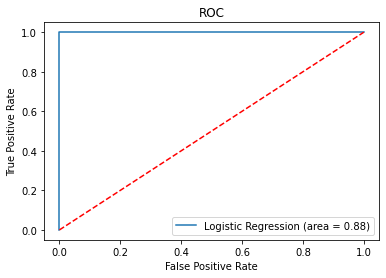

In [31]:
y_pred_test_l2 = fit.predict(X_test_l2.loc[:,best_features])
y_pred_test_l2_prob = fit.predict_proba(X_test_l2.loc[:,best_features])
cm_test_l2 = metrics.confusion_matrix(y_test_l2, y_pred_test_l2)

fpr, tpr, _ =metrics.roc_curve(y_test_l2.to_numpy(dtype=int), y_pred_test_l2_prob[:, 1], pos_label=1)
auc_test_l2 = metrics.auc(fpr, tpr)
logit_roc_auc = metrics.roc_auc_score(y_test_l2, y_pred_test_l2)
_,p=chi2(X_train[best_features],y_train)
coef_values = pd.DataFrame({"P-values":p})
coef_values['features'] = best_features
print('\nConfusion Matrix:\n',cm_test_l2)
print('\nAUC:\n',auc_test_l2)
print('\nScore:\n',logit_roc_auc)
print('\np-value:\n',coef_values)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Yes, from the dataset we can see that the bending activities is far more less than the other activities.

(e) i.

In [32]:
result2 = {}
for l in range(0,20):
    X_train = DFs[l].drop(['activity','L','Instances'],axis = 1)
    y_train = DFs[l]['activity']
    X_test = DF_test[l].drop(['activity','L','Instances'],axis = 1)
    y_test = DF_test[l]['activity']
    model = LogisticRegressionCV(cv = 5,penalty='l1', solver = 'liblinear')
    np_arr = X_train.to_numpy()
    fit1 = model.fit(np_arr,y_train)
    result2[l] = [l,fit1.C_,fit1.score(X_test,y_test)]
result2

{0: [0, array([0.35938137]), 1.0],
 1: [1, array([166.81005372]), 0.9473684210526315],
 2: [2, array([2.7825594]), 1.0],
 3: [3, array([2.7825594]), 0.9473684210526315],
 4: [4, array([0.35938137]), 0.9473684210526315],
 5: [5, array([0.35938137]), 1.0],
 6: [6, array([2.7825594]), 1.0],
 7: [7, array([21.5443469]), 1.0],
 8: [8, array([0.35938137]), 1.0],
 9: [9, array([21.5443469]), 1.0],
 10: [10, array([21.5443469]), 1.0],
 11: [11, array([0.35938137]), 0.9473684210526315],
 12: [12, array([21.5443469]), 1.0],
 13: [13, array([2.7825594]), 0.9473684210526315],
 14: [14, array([21.5443469]), 1.0],
 15: [15, array([0.35938137]), 0.9473684210526315],
 16: [16, array([21.5443469]), 1.0],
 17: [17, array([2.7825594]), 0.9473684210526315],
 18: [18, array([2.7825594]), 1.0],
 19: [19, array([0.35938137]), 0.9473684210526315]}

Best L is 1 with penalty weights = 0.35938137

(e) ii.


Confusion Matrix:
 [[15  0]
 [ 0  4]]

AUC:
 1.0

Score:
 1.0

p-value:
         P-values features
0   8.282661e-01     max1
1   5.160233e-01    mean1
2   4.813240e-01  median1
3   1.209810e-03     max2
4   5.736801e-03    mean2
5   9.163772e-02  median2
6   2.203153e-03     max3
7   6.443739e-02    mean3
8   1.350685e-01  median3
9   9.108711e-01     max4
10  5.135780e-02    mean4
11  5.442828e-01  median4
12  3.221813e-12     max5
13  1.940859e-11    mean5
14  6.246321e-01  median5
15  7.300402e-02     max6
16  2.569169e-02    mean6
17  2.691942e-01  median6


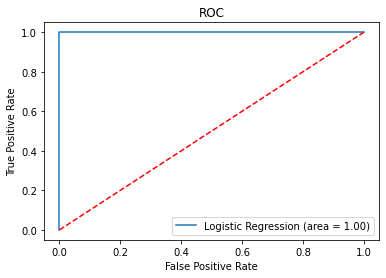

In [33]:
X_train_l1 = DFs[0].drop(['activity','L','Instances'],axis = 1)
y_train_l1 = DFs[0]['activity']
model = LogisticRegressionCV(cv = 5,penalty='l1', solver = 'liblinear')
fit = model.fit(X_train_l1,y_train_l1)

X_test_l1 = DF_test[0].drop(['activity','L','Instances'],axis = 1)
y_test_l1 = DF_test[0]['activity']
y_pred_l1 = fit.predict(X_test_l1)
y_pred_l1_prob = fit.predict_proba(X_test_l1)

cm_l1 = metrics.confusion_matrix(y_test_l1, y_pred_l1)
fpr, tpr, _ =metrics.roc_curve(y_test_l1.to_numpy(dtype=int), y_pred_l1_prob[:, 1], pos_label=1)
auc_l1 = metrics.auc(fpr, tpr)
logit_roc_auc = metrics.roc_auc_score(y_test_l1, y_pred_l1)
_,p=chi2(X_train_l1,y_train_l1)
coef_values = pd.DataFrame({"P-values":p})
coef_values['features'] = X_train_l1.columns

print('\nConfusion Matrix:\n',cm_l1)
print('\nAUC:\n',auc_l1)
print('\nScore:\n',logit_roc_auc)
print('\np-value:\n',coef_values)


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

The L-1 penalized model performed better with higher AUC compared to the previous one

(f) i.

Dataset contain all activities

In [34]:
result3 = OrderedDict()
DF_train = []
for l in range(1,21):
    result3[l] = {}
    for i in range(0,len(train_dfs)):
        df = train_dfs[i].iloc[:,1:7]
        df_split=np.array_split(df,l)
        ds = []
        for k in range(0,l):
            dss = df_split[k].reset_index(drop=True)
            ds.append(dss)
            new_df = pd.concat(ds,axis=1)
        result3[l][i] = {}
        result3[l][i]['L'] = l
        result3[l][i]['Instances'] = i+1
        for c in range(0,6*l):
            result3[l][i]['max'+str(c+1)] = new_df.iloc[:,c].max()
            result3[l][i]['mean'+str(c+1)] = new_df.iloc[:,c].mean()
            result3[l][i]['median'+str(c+1)] = new_df.iloc[:,c].std()
        if i in range(0, 5):
            result3[l][i]['activity'] = "1"
        elif i in range(5, 9):
            result3[l][i]['activity'] = "2"
        elif i in range(9, 21):
            result3[l][i]['activity'] = "3"
        elif i in range(21, 33):
            result3[l][i]['activity'] = "4"
        elif i in range(33, 45):
            result3[l][i]['activity'] = "5"
        elif i in range(45, 57):
            result3[l][i]['activity'] = "6"
        else:
            result3[l][i]['activity'] = "7"
    DF = pd.DataFrame.from_dict({(a,b): result3[a][b] 
                           for a in result3.keys() 
                           for b in result3[a].keys()},
                       orient='index').reset_index(drop=True)
    sdf = DF[DF['L'] == l].dropna(axis='columns')
    DF_train.append(sdf)
DF_train[0]

,L,Instances,max1,mean1,median1,max2,mean2,median2,max3,mean3,...,max4,mean4,median4,max5,mean5,median5,max6,mean6,median6,activity
0,1,1,47.40,43.954500,1.558835,1.70,0.426250,0.338690,29.75,22.122354,...,4.44,0.497313,0.550657,38.50,35.588458,1.999604,1.79,0.493292,0.513506,1
1,1,2,47.75,42.179813,3.670666,3.00,0.696042,0.630860,30.00,22.183625,...,5.15,0.989917,0.953730,38.67,33.493917,3.849448,2.18,0.613521,0.524317,1
2,1,3,45.75,41.678063,2.243490,2.83,0.535979,0.405469,28.25,19.006562,...,6.42,0.841875,0.928801,37.50,29.857083,2.411026,1.79,0.383292,0.389164,1
3,1,4,48.00,43.454958,1.386098,1.58,0.378083,0.315566,27.00,15.793333,...,10.03,0.849354,0.995761,33.50,23.034792,2.488862,5.26,0.679646,0.622534,1
4,1,5,48.00,43.969125,1.618364,1.50,0.413125,0.263111,26.33,15.868021,...,5.17,0.666354,0.788985,30.75,22.103750,3.318301,2.96,0.555313,0.487826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,65,45.33,33.586875,4.650935,14.67,4.576562,2.461077,23.25,15.317854,...,9.00,3.227229,1.647474,25.00,15.892146,3.283983,8.32,3.259729,1.640243,7
65,1,66,45.50,34.322750,4.752477,13.47,4.456333,2.599284,22.25,15.209771,...,9.00,3.277229,1.500046,23.25,15.550458,3.119856,9.67,3.432562,1.732727,7
66,1,67,46.00,34.546229,4.842294,12.47,4.371958,2.360448,22.67,15.185729,...,8.34,3.028687,1.665184,22.75,15.759542,2.823124,10.00,3.338125,1.656742,7
67,1,68,46.25,34.873229,4.531720,14.82,4.380583,2.435437,24.25,15.471188,...,9.90,3.205688,1.519348,23.50,15.873896,3.131076,9.51,3.424646,1.690960,7


In [35]:
result = OrderedDict()
DF_tests = []
for l in range(1,21):
    result[l] = {}
    for i in range(0,len(test_dfs)):
        df = test_dfs[i].iloc[:,1:7]
        df_split=np.array_split(df,l)
        ds = []
        for k in range(0,l):
            dss = df_split[k].reset_index(drop=True)
            ds.append(dss)
            new_df = pd.concat(ds,axis=1)
        result[l][i] = {}
        result[l][i]['L'] = l
        result[l][i]['Instances'] = i+1
        for c in range(0,6*l):
            result[l][i]['max'+str(c+1)] = new_df.iloc[:,c].max()
            result[l][i]['mean'+str(c+1)] = new_df.iloc[:,c].mean()
            result[l][i]['median'+str(c+1)] = new_df.iloc[:,c].std()
        if i in range(0, 2):
            result[l][i]['activity'] = "1"
        elif i in range(2, 4):
            result[l][i]['activity'] = "2"
        elif i in range(4, 7):
            result[l][i]['activity'] = "3"
        elif i in range(7, 10):
            result[l][i]['activity'] = "4"
        elif i in range(10, 13):
            result[l][i]['activity'] = "5"
        elif i in range(13, 16):
            result[l][i]['activity'] = "6"
        else:
            result[l][i]['activity'] = "7"
    DF = pd.DataFrame.from_dict({(a,b): result[a][b] 
                           for a in result.keys() 
                           for b in result[a].keys()},
                       orient='index').reset_index(drop=True)
    sdf = DF[DF['L'] == l].dropna(axis='columns')
    DF_tests.append(sdf)
DF_tests[0]

,L,Instances,max1,mean1,median1,max2,mean2,median2,max3,mean3,...,max4,mean4,median4,max5,mean5,median5,max6,mean6,median6,activity
0,1,1,45.00,40.624792,1.476967,1.30,0.358604,0.322605,29.50,19.040937,...,7.23,0.832542,0.965659,38.25,34.311292,2.188449,1.92,0.570583,0.582915,1
1,1,2,45.67,42.812812,1.435550,1.22,0.372438,0.289158,29.50,20.096979,...,5.76,0.876438,1.047259,38.50,33.024583,1.995255,3.11,0.571083,0.601010,1
2,1,3,51.00,24.562958,3.737514,6.87,0.590833,0.837408,25.33,19.121333,...,6.76,0.736771,0.927048,30.00,23.493042,3.693786,4.97,0.700188,0.693720,2
3,1,4,42.75,27.464604,3.583582,7.76,0.449708,0.767197,35.00,20.842542,...,5.76,0.779917,0.904436,33.00,17.617937,5.053642,6.76,1.122125,1.012342,2
4,1,5,45.00,37.177042,3.581301,8.58,2.374208,1.601799,26.75,16.531083,...,8.05,2.910604,1.600137,25.50,19.607250,2.890347,9.34,2.921729,1.852600,3
5,1,6,44.75,37.561188,3.226507,9.91,2.080688,1.639258,24.67,16.567042,...,8.32,3.033875,1.625415,24.33,19.518896,2.727377,9.62,2.765896,1.769203,3
6,1,7,44.67,37.058708,3.710180,14.17,2.438146,1.996887,24.00,16.388312,...,9.74,2.980688,1.612059,24.25,18.125958,3.537144,8.55,2.983750,1.815730,3
7,1,8,30.00,27.716375,1.442253,1.79,0.363688,0.394817,13.25,6.078563,...,5.02,0.871021,0.777400,21.00,8.337438,4.074511,4.50,0.734271,0.613688,4
8,1,9,48.33,44.182937,7.495615,3.11,0.101875,0.346756,16.50,6.679958,...,5.91,0.584104,0.749945,12.75,4.376292,3.274539,3.91,0.692771,0.675781,4
9,1,10,48.25,48.004167,0.032038,0.43,0.007167,0.055106,13.00,4.900563,...,2.86,0.397313,0.447127,12.00,7.624896,3.268502,2.50,0.641229,0.388372,4


multinomial model

In [36]:
result3 = {}
for l in range(0,20):
    X_train = DF_train[l].drop(['activity','L','Instances'],axis = 1)
    y_train = DF_train[l]['activity']
    X_test = DF_tests[l].drop(['activity','L','Instances'],axis = 1)
    y_test = DF_tests[l]['activity']

    model = LogisticRegressionCV(cv = 5,penalty='l1', multi_class ='multinomial', solver = 'saga')
    fit1 = model.fit(X_train,y_train)
    result3[l] = [l+1,fit1.score(X_test,y_test)]
result3

{0: [1, 0.7894736842105263],
 1: [2, 0.7894736842105263],
 2: [3, 0.7368421052631579],
 3: [4, 0.7894736842105263],
 4: [5, 0.7894736842105263],
 5: [6, 0.8421052631578947],
 6: [7, 0.7894736842105263],
 7: [8, 0.8421052631578947],
 8: [9, 0.8421052631578947],
 9: [10, 0.8421052631578947],
 10: [11, 0.8947368421052632],
 11: [12, 0.8421052631578947],
 12: [13, 0.8421052631578947],
 13: [14, 0.7894736842105263],
 14: [15, 0.7894736842105263],
 15: [16, 0.8421052631578947],
 16: [17, 0.7368421052631579],
 17: [18, 0.8421052631578947],
 18: [19, 0.8421052631578947],
 19: [20, 0.8421052631578947]}

In [37]:
score = [result3[x][1] for x in range(0,20)]
L = [result3[x][0] for x in range(0,20)]
f_sum = pd.DataFrame({'L': L, 'score': score})
f_sum.loc[[f_sum['score'].idxmax()]]

,L,score
10,11,0.894737


L = 11, max score = 0.894737


Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [1 0 1 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]

AUC:
 0.9411764705882353

p-value:
          P-values   features
0    3.863950e-02       max1
1    9.199310e-04      mean1
2    7.038207e-21    median1
3    1.673468e-55       max2
4    2.159478e-22      mean2
..            ...        ...
355  7.549440e-11    mean119
356  1.958207e-01  median119
357  8.779908e-18     max120
358  5.963866e-10    mean120
359  3.093368e-03  median120

[360 rows x 2 columns]


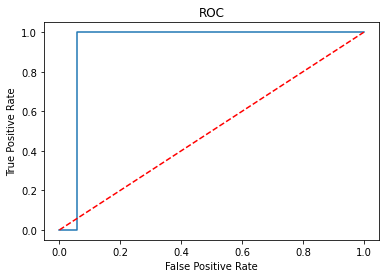

In [38]:
X_train_l11 = DF_train[10].drop(['activity','L','Instances'],axis = 1)
y_train_l11 = DF_train[10]['activity']
X_test_l11 = DF_tests[10].drop(['activity','L','Instances'],axis = 1)
y_test_l11 = DF_tests[10]['activity']
model = LogisticRegressionCV(cv = 5,penalty='l1', multi_class ='multinomial', solver = 'saga')
fit = model.fit(X_train_l11,y_train_l11)
y_pred_l11 = fit.predict(X_test_l11)
y_pred_l11_prob = fit.predict_proba(X_test_l11)
cm_l11 = metrics.confusion_matrix(y_test_l11, y_pred_l11)
fpr, tpr, _ =metrics.roc_curve(y_test_l11.to_numpy(dtype=int), y_pred_l11_prob[:, 1], pos_label=1)
auc_l11 = metrics.auc(fpr, tpr)
_,p=chi2(X_train,y_train)
coef_values = pd.DataFrame({"P-values":p})
coef_values['features'] = X_train.columns
print('\nConfusion Matrix:\n',cm_l11)
print('\nAUC:\n',auc_l11)
print('\np-value:\n',coef_values)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

(f) ii.

Gaussian model

In [39]:
result4 = {}
for l in range(0,20):
    X_train = DF_train[l].drop(['activity','L','Instances'],axis = 1)
    y_train = DF_train[l]['activity']
    X_test = DF_tests[l].drop(['activity','L','Instances'],axis = 1)
    y_test = DF_tests[l]['activity']
    
    model = GaussianNB()
    fit = model.fit(X_train,y_train)
    result4[l] = [l+1,fit.score(X_test,y_test)]
result4

{0: [1, 0.8947368421052632],
 1: [2, 0.9473684210526315],
 2: [3, 0.8947368421052632],
 3: [4, 0.8947368421052632],
 4: [5, 0.8421052631578947],
 5: [6, 0.8421052631578947],
 6: [7, 0.7894736842105263],
 7: [8, 0.8421052631578947],
 8: [9, 0.8421052631578947],
 9: [10, 0.8421052631578947],
 10: [11, 0.7894736842105263],
 11: [12, 0.7368421052631579],
 12: [13, 0.6842105263157895],
 13: [14, 0.8421052631578947],
 14: [15, 0.7368421052631579],
 15: [16, 0.7894736842105263],
 16: [17, 0.7368421052631579],
 17: [18, 0.7368421052631579],
 18: [19, 0.7894736842105263],
 19: [20, 0.7368421052631579]}

In [40]:
score = [result4[x][1] for x in range(0,20)]
L = [result4[x][0] for x in range(0,20)]
sum_g = pd.DataFrame({'L': L, 'score': score})
sum_g.loc[[sum_g['score'].idxmax()]]

,L,score
1,2,0.947368


L = 2, max score = 0.947368


Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]

score:
 0.9473684210526315


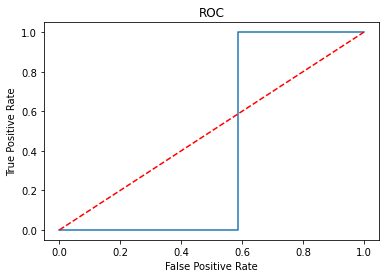

In [41]:
X_train1 = DF_train[1].drop(['activity','L','Instances'],axis = 1)
y_trainl = DF_train[1]['activity']
X_test1 = DF_tests[1].drop(['activity','L','Instances'],axis = 1)
y_test1 = DF_tests[1]['activity']
model = GaussianNB()
fit = model.fit(X_train1,y_trainl)
y_pred1 = fit.predict(X_test1)
y_pred1_prob = fit.predict_proba(X_test1)
cm1 = metrics.confusion_matrix(y_test1, y_pred1)
fpr, tpr, _ =metrics.roc_curve(y_test1.to_numpy(dtype=int), y_pred1_prob[:, 1], pos_label=1)
score = fit.score(X_test1,y_test1)

print('\nConfusion Matrix:\n',cm1)
print('\nscore:\n',score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Multinomial model

In [42]:
result5 = {}
for l in range(0,20):
    X_train = DF_train[l].drop(['activity','L','Instances'],axis = 1)
    y_train = DF_train[l]['activity']
    X_test = DF_tests[l].drop(['activity','L','Instances'],axis = 1)
    y_test = DF_tests[l]['activity']
    
    model = MultinomialNB()
    fit = model.fit(X_train,y_train)
    result5[l] = [l+1,fit.score(X_test,y_test)]
result5

{0: [1, 0.8947368421052632],
 1: [2, 0.7894736842105263],
 2: [3, 0.7894736842105263],
 3: [4, 0.8421052631578947],
 4: [5, 0.8421052631578947],
 5: [6, 0.8421052631578947],
 6: [7, 0.8947368421052632],
 7: [8, 0.8421052631578947],
 8: [9, 0.7368421052631579],
 9: [10, 0.7894736842105263],
 10: [11, 0.9473684210526315],
 11: [12, 0.8421052631578947],
 12: [13, 0.8421052631578947],
 13: [14, 0.7894736842105263],
 14: [15, 0.8421052631578947],
 15: [16, 0.8421052631578947],
 16: [17, 0.8947368421052632],
 17: [18, 0.8421052631578947],
 18: [19, 0.8947368421052632],
 19: [20, 0.8947368421052632]}

In [43]:
score = [result5[x][1] for x in range(0,20)]
L = [result5[x][0] for x in range(0,20)]
sum_m = pd.DataFrame({'L': L, 'score': score})
sum_m.loc[[sum_m['score'].idxmax()]]

,L,score
10,11,0.947368


L = 11, max score = 0.947368


Confusion Matrix:
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]

score:
 0.9473684210526315


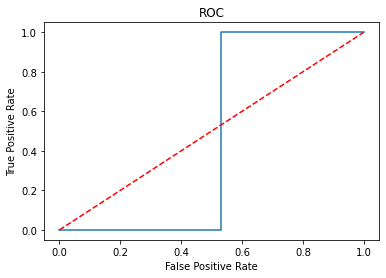

In [44]:
X_train2 = DF_train[10].drop(['activity','L','Instances'],axis = 1)
y_train2 = DF_train[10]['activity']
X_test2 = DF_tests[10].drop(['activity','L','Instances'],axis = 1)
y_test2 = DF_tests[10]['activity']
model = MultinomialNB()
fit = model.fit(X_train2,y_train2)
y_pred2 = fit.predict(X_test2)
y_pred2_prob = fit.predict_proba(X_test2)
cm2 = metrics.confusion_matrix(y_test2, y_pred2)
fpr, tpr, _ =metrics.roc_curve(y_test2.to_numpy(dtype=int), y_pred2_prob[:, 1], pos_label=1)
score = fit.score(X_test2,y_test2)

print('\nConfusion Matrix:\n',cm2)
print('\nscore:\n',score)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

(f) iii.

The score for multinomial and Gaussian models are the same, but the ROC for logistic regression looks better than the other two Naive Bayes’ classifier